<a href="https://colab.research.google.com/github/JonathanSosa-py/pandas_notebooks/blob/main/10_Working_with_Dates_and_Time_Series_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('/content/ETH_1h.csv')

In [8]:
df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [9]:
df.shape

(23674, 7)

This column of dates are not actually a date/time object since it's not in a format that datetimes usually display as but if you wanna be sure you can always try running a pandas' datetime method on this to see if it works:

In [10]:
# Grab the date value from the first row.
df.loc[0, 'Date']

'2020-03-13 08-PM'

In [11]:
# Now let's try to run a datetime method on this value
# .day_name() method

df.loc[0, 'Date'].day_name()

AttributeError: ignored

This error is because our date is a string an it doesn't have any attribute called 'day_name'

In [12]:
# Convert a column in a datetime value

df['Date'] = pd.to_datetime(df['Date'])

ParserError: ignored

We are not going to run this right now because if we run this as is then pandas would do its best to figure out the formatting of the datetime and converted accordingly but the datetime that we have here is in a pretty different format.


What we need to do here is pass in a format string specifying how dates are formatted so that it can parse this correctly:

2020-03-13 08-PM

%Y-%m-%d %I-%p

In [13]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %I-%p')

In [14]:
df['Date']

0       2020-03-13 20:00:00
1       2020-03-13 19:00:00
2       2020-03-13 18:00:00
3       2020-03-13 17:00:00
4       2020-03-13 16:00:00
                ...        
23669   2017-07-01 15:00:00
23670   2017-07-01 14:00:00
23671   2017-07-01 13:00:00
23672   2017-07-01 12:00:00
23673   2017-07-01 11:00:00
Name: Date, Length: 23674, dtype: datetime64[ns]

We should be able to run de ".day_name" method that gaves us an error before 

In [15]:
df.loc[0, 'Date'].day_name()

'Friday'

The way we did this here is that we converted this to a date after we loaded in our data.

But if we wanted to convert this to a date as we're loading in our data then we can also do that as well:

In [16]:
from datetime import datetime

# Create the function to parse the column to a datetime value
d_parser = lambda x: datetime.strptime(x, '%Y-%m-%d %I-%p')

df1 = pd.read_csv('/content/ETH_1h.csv', parse_dates=['Date'], date_parser=d_parser)

When we used 'pd.to_datetime' we actually passed in an entire series to pd.to_datetime, but now the X on lambda is goign to be each individual string and it's going to send each individual string through this function so in order to convert this we can use a funtion called:

```python
pd.datetime.strptime(x, '%Y-%m-%d %I-%p')
```

In [17]:
df1.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [18]:
df.loc[0, 'Date'].day_name()

'Friday'

# Useful things that we can do with datetimes

```python
df.loc[0, 'Date'].day_name()
```

We saw how to run a datetime method on a single value when we use this day_name method but what if we want to run that method on our entire series.

So let's say that we wanted to view the name of this entire date column here, so to do this **we can access the "dt" class on the series object** and access the datetime methods that way so to do this we can just say:

In [19]:
df['Date'].dt.day_name()

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
23669    Saturday
23670    Saturday
23671    Saturday
23672    Saturday
23673    Saturday
Name: Date, Length: 23674, dtype: object

In [20]:
# Create another column so that we can quickly reference what day all of these trades took place:

df['DayOfWeek'] = df['Date'].dt.day_name()

In [21]:
df.head()

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday


Let's see how we can explore our data a bit so we can see by looking at the indexes here on the far left that there are over 20,000 rows in this dataset so let's see how we can view the earliest and latest dates in this data so to do this we can use the **min** and **max** methods 

In [22]:
# earliest
df['Date'].min()

Timestamp('2017-07-01 11:00:00')

In [23]:
# latest
df['Date'].max()

Timestamp('2020-03-13 20:00:00')

One really cool thing with datimes is that we can actually subtract dates in order to view the time between those two dates and this is called a timedelta.

So to get the amount of time that spans between these two dates here then I could simply say:

In [24]:
df['Date'].max() - df['Date'].min()

Timedelta('986 days 09:00:00')

Then we can see that we get this timedelta that says that there are almost a thounsand days between the earliest day in our dataset and the most recent so we have 986 days in this entire dataset of cryptocurrency data, almost a thounsand.

## Filtering by dates

In [25]:
# We just want the data for 2020 using strings

filt = (df['Date'] >= '2020')
df.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
1744,2020-01-01 04:00:00,ETHUSD,129.57,130.00,129.50,129.56,702786.82,Wednesday
1745,2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23,Wednesday
1746,2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72,Wednesday
1747,2020-01-01 01:00:00,ETHUSD,128.34,130.14,128.32,130.14,635419.40,Wednesday


In [26]:
# We just want the data for 2019 using strings

filt = (df['Date'] >= '2019') & (df['Date'] < '2020')
df.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,Tuesday


In [27]:
# Using datetimes

filt = (df['Date'] >= datetime.strptime('2019-01-01', '%Y-%m-%d')) & (df['Date'] < datetime.strptime('2020-01-01', '%Y-%m-%d'))
df.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,Tuesday


One nice feature about dates is that if we set our index so that it uses the date which would actually be a good idea for this dataset since all of these timestamps are unique then we can actually do this same thing by using slicing instead.

So let's see what this looks like so:

In [28]:
df.set_index("Date", inplace=True)

In [29]:
df

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...
2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday


In [30]:
df.loc['2019']

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...
2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday


In [31]:
# Using slicing
df.loc['2019-01-01':'2020-01-01', 'Volume']

Date
2020-01-01 23:00:00     215362.64
2020-01-01 22:00:00     411940.73
2020-01-01 21:00:00    1168999.08
2020-01-01 20:00:00     162346.84
2020-01-01 19:00:00     167992.84
                          ...    
2019-01-01 04:00:00    2791135.37
2019-01-01 03:00:00     503732.63
2019-01-01 02:00:00     838183.43
2019-01-01 01:00:00     434917.99
2019-01-01 00:00:00    1067136.21
Name: Volume, Length: 8784, dtype: float64

In [32]:
df.loc['2020-01':'2020-02']

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-02-29 23:00:00,ETHUSD,223.35,223.58,216.83,217.31,1927939.88,Saturday
2020-02-29 22:00:00,ETHUSD,223.48,223.59,222.14,223.35,535998.57,Saturday
2020-02-29 21:00:00,ETHUSD,224.63,225.14,222.74,223.48,561158.03,Saturday
2020-02-29 20:00:00,ETHUSD,225.31,225.33,223.50,224.63,511648.65,Saturday
2020-02-29 19:00:00,ETHUSD,225.09,225.85,223.87,225.31,1250856.20,Saturday
...,...,...,...,...,...,...,...
2020-01-01 04:00:00,ETHUSD,129.57,130.00,129.50,129.56,702786.82,Wednesday
2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23,Wednesday
2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72,Wednesday


This can be really useful for analyzing our data because let's say that we wanted to get the average closing price for a etherium for all of our rows of these dates:

In [33]:
# get the average closing price for a etherium for all of our rows within that timeframe (from '2020-01' to '2020-02')

df.loc['2020-01':'2020-02', "Close"].mean()

195.16559027777814

### What if we wanted to see this data in a different way. What if we instead wanted to look at this data on a daily basis instead of on an hourly basis.

### Well first we need to think about what would make sense to view on a daily, so for example, let's say that we wanted to  view the highs for each day.

So rigt now we have all of these highs broken down by hour, let's grab the first 24 rows.

In [34]:
df.loc['2020-01':'2020-02'].head(24)

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-02-29 23:00:00,ETHUSD,223.35,223.58,216.83,217.31,1927939.88,Saturday
2020-02-29 22:00:00,ETHUSD,223.48,223.59,222.14,223.35,535998.57,Saturday
2020-02-29 21:00:00,ETHUSD,224.63,225.14,222.74,223.48,561158.03,Saturday
2020-02-29 20:00:00,ETHUSD,225.31,225.33,223.50,224.63,511648.65,Saturday
2020-02-29 19:00:00,ETHUSD,225.09,225.85,223.87,225.31,1250856.20,Saturday
2020-02-29 18:00:00,ETHUSD,225.53,226.17,224.50,225.09,496543.91,Saturday
2020-02-29 17:00:00,ETHUSD,222.68,225.53,222.24,225.53,611136.47,Saturday
2020-02-29 16:00:00,ETHUSD,224.17,225.93,222.36,222.68,694384.75,Saturday
2020-02-29 15:00:00,ETHUSD,223.35,225.88,221.80,224.17,550893.74,Saturday


So we can see for Frebuary 29th we have all these different hours and each hour has a different high value but what if we were like "okay, well, we see all these different high values here but what was the highest value of the day?" 

Let's grab a single day:

In [35]:
df.loc['2020-01-01', "High"]

Date
2020-01-01 23:00:00    130.27
2020-01-01 22:00:00    131.41
2020-01-01 21:00:00    131.99
2020-01-01 20:00:00    131.87
2020-01-01 19:00:00    131.72
2020-01-01 18:00:00    132.14
2020-01-01 17:00:00    132.68
2020-01-01 16:00:00    132.56
2020-01-01 15:00:00    132.15
2020-01-01 14:00:00    132.05
2020-01-01 13:00:00    132.08
2020-01-01 12:00:00    131.31
2020-01-01 11:00:00    131.42
2020-01-01 10:00:00    130.33
2020-01-01 09:00:00    130.22
2020-01-01 08:00:00    130.01
2020-01-01 07:00:00    130.25
2020-01-01 06:00:00    130.25
2020-01-01 05:00:00    129.94
2020-01-01 04:00:00    130.00
2020-01-01 03:00:00    130.44
2020-01-01 02:00:00    130.50
2020-01-01 01:00:00    130.14
2020-01-01 00:00:00    128.54
Name: High, dtype: float64

**We don't really care what the highs are for each hour of each day** we just want to know the high for the entire day.

so to do this:

In [36]:
df.loc['2020-01-01', "High"].max()

132.68

# RESAMPLING

Right now our data is broken down on an hourly basis so if we want to redo this so that it's instead broken down by day or week or month then we'll do this by doing something call ***resampling***.

Let's see what it looks like:

In [37]:
# See high value by day

df['High'].resample('D').max()

# What do we want to do with these resampling if I'm looking at entire days here
# so if I take this entire day of the first (2020-01-01).

# What do I want to do with this high value? An we're just saying "Well we want
# the max value for each of those days"

Date
2017-07-01    279.99
2017-07-02    293.73
2017-07-03    285.00
2017-07-04    282.83
2017-07-05    274.97
               ...  
2020-03-09    208.65
2020-03-10    206.28
2020-03-11    202.98
2020-03-12    195.64
2020-03-13    148.00
Freq: D, Name: High, Length: 987, dtype: float64

In [38]:
highs = df['High'].resample('D').max()
highs.loc['2020-01-01']

132.68

Now instead of just getting one day at time like we did here 

```python
df.loc['2020-01-01', "High"].max()
```

Now that we've resampled this
```python
df['High'].resample('D').max()
```

Now we have those high values for every single day in our data.

Why would something like this be useful, I mean, you know, that might be useful just because it is interesting but there are other things that we can do as well so let's say that maybe we wanted to plot this out but instead of you kno viewing a plot that had these prices broken down hour by hour now we can just do a plot for the total price broken by day:

In [39]:
import matplotlib as plt

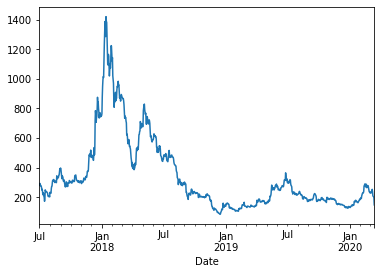

In [40]:
highs.plot()

In [41]:
highs.max()

1419.96

One thing that you might be wondering is if it's possible to resample multiple columns at once and ***we can do that by running the resample method*** on our entire dataframe instead of one a single series so for example what do I mean by this:

Whenever I say resample multiple columns at once I mean that what if we wanted to resample this by day but so far we've only seen how we got the high value but what if we said okay well I want to resample this  by day but I also want  the average closing cost of that entire day, I want the sum of all of these volumes for that entire day and then I want the max high value and I want the mean low value.

So the way that we've done that down here 

```python
highs = df['High'].resample('D').max()
```

where we just access that single column we wouldn't be able to do it using the method that we did here so in order to resample and use multiple columns like that here's how we can do this:


In [42]:
# RESAMPLING BY WEEK USING THE SAME AGGREGATION METHOD ON EVERYTHING: mean()
df.resample('W').mean()

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-02,268.066486,271.124595,264.819730,268.202162,2.185035e+06
2017-07-09,261.337024,262.872917,259.186190,261.062083,1.337349e+06
2017-07-16,196.193214,199.204405,192.722321,195.698393,2.986756e+06
2017-07-23,212.351429,215.779286,209.126310,212.783750,4.298593e+06
2017-07-30,203.496190,205.110357,201.714048,203.309524,1.581729e+06
...,...,...,...,...,...
2020-02-16,255.021667,257.255238,252.679762,255.198452,2.329087e+06
2020-02-23,265.220833,267.263690,262.948512,265.321905,1.826094e+06
2020-03-01,236.720536,238.697500,234.208750,236.373988,2.198762e+06


This is gonna give us the mean() values for each of our columns on a weekly basis, now this is cool that we can do this and sometimes you might want to do something like this.

But in this instance it doesn't really make sense to use mean to get the average of all of our columns so for example there's no real reason to get the average volume per hour or something like that, you probably want to get the sum for the entire time period or for our high and low values here these are giving us the average highs and the average lows but the point of a high and low value is to now the high for taht time period and the low for that time period so we probably don't want mean() here either.

So how we can resample this to where we can resample and use multiple columns but also use multiple aggregation methods.

Now we've actually seen this in previous videos and use this method but what we want to do use here is the AGG, the AGG method and this method also accept a map of columns and the aggregation functions that we want to run on that column so for example let's do this with the values for let's see we'll do the closing column, we'll do the high and low columns and then we'll also do the volume here so:

In [44]:
df.resample('W').agg({'Close': 'mean', 'High': 'max', 'Low': 'min', 'Volume': 'sum'})

,Close,High,Low,Volume
Date,,,,
2017-07-02,268.202162,293.73,253.23,8.084631e+07
2017-07-09,261.062083,285.00,231.25,2.246746e+08
2017-07-16,195.698393,240.33,130.26,5.017750e+08
2017-07-23,212.783750,249.40,153.25,7.221637e+08
2017-07-30,203.309524,229.99,178.03,2.657305e+08
...,...,...,...,...
2020-02-16,255.198452,290.00,216.31,3.912867e+08
2020-02-23,265.321905,287.13,242.36,3.067838e+08
2020-03-01,236.373988,278.13,209.26,3.693920e+08
